# pandas

In [1]:
import sys
import numpy as np
import pandas as pd

print(sys.version)
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))

3.8.8 | packaged by conda-forge | (default, Feb 20 2021, 16:22:27) 
[GCC 9.3.0]
NumPy: 1.20.1
pandas: 1.2.3


## インデックス名とカラム名を指定

In [2]:
df = pd.DataFrame(np.arange(6).reshape((3, 2)))
df.index = ["01", "02", "03"]
df.columns = ["A", "B"]
df

,A,B
01,0,1
02,2,3
03,4,5


In [3]:
# DataFrame作成時に指定
pd.DataFrame(np.arange(6).reshape((3, 2)),
             index=["01", "02", "03"],
             columns=["A", "B"])

,A,B
01,0,1
02,2,3
03,4,5


In [4]:
# Dictionaryで値を渡すと、カラムのみ設定できる
pd.DataFrame({"A": ["0", "2", "4"],
              "B": ["1", "3", "5"]})

,A,B
0,0,1
1,2,3
2,4,5


In [5]:
# データの用意
df = pd.read_excel("data/201704health.xlsx")

# 既存の「日付」カラムをインデックスとして設定
df.set_index("日付").head(3)

,歩数,摂取カロリー
日付,,
2017-04-01,5439,2500
2017-04-02,2510,2300
2017-04-03,10238,1950


## データの抽出(`loc`と`iloc`)

In [6]:
# データの用意
df = pd.DataFrame(np.arange(12).reshape((4, 3)),
                  columns=["A", "B", "C"],
                  index=["1行目", "2行目", "3行目", "4行目"])
df

,A,B,C
1行目,0,1,2
2行目,3,4,5
3行目,6,7,8
4行目,9,10,11


### `loc`メソッド

インデックス名、カラム名を指定する

[pandas.DataFrame.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)

In [7]:
df.loc[:, ["A", "B"]]

,A,B
1行目,0,1
2行目,3,4
3行目,6,7
4行目,9,10


In [8]:
df.loc[["1行目", "2行目"], :]

,A,B,C
1行目,0,1,2
2行目,3,4,5


### `iloc`メソッド

インデックス番号、カラム番号を指定する

[pandas.DataFrame.iloc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html)

In [9]:
df.iloc[2:, :]

,A,B,C
3行目,6,7,8
4行目,9,10,11


In [10]:
df.iloc[:, [0, 2]]

,A,C
1行目,0,2
2行目,3,5
3行目,6,8
4行目,9,11


## データの読み込み・書き込み

### csvファイル

[pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

[pandas.DataFrame.to_csv](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)

In [11]:
df = pd.read_csv("data/201704health.csv", encoding="utf-8", sep=",", usecols=["日付", "摂取カロリー"])
df.head(3)

,日付,摂取カロリー
0,2017-04-01,2500
1,2017-04-02,2300
2,2017-04-03,1950


In [12]:
df.to_csv("data/write_data.csv")

### Excelファイル

[pandas.read_excel](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)

[pandas.DataFrame.to_excel](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html)

In [13]:
df = pd.read_excel("data/201704health.xlsx", usecols=["日付", "摂取カロリー"])
df.head(3)

,日付,摂取カロリー
0,2017-04-01,2500
1,2017-04-02,2300
2,2017-04-03,1950


In [14]:
df.to_excel("data/write_data.xlsx")

### HTML

[pandas.read_html](https://pandas.pydata.org/docs/reference/api/pandas.read_html.html)

In [15]:
# wikipediaのトップレベルドメイン一覧のページ
url = "https://ja.wikipedia.org/wiki/%E3%83%88%E3%83%83%E3%83%97%E3%83%AC%E3%83%99%E3%83%AB%E3%83%89%E3%83%A1%E3%82%A4%E3%83%B3%E4%B8%80%E8%A6%A7"
tables = pd.read_html(url)

# htmlのtableタグの数を取得
len(tables)

43

In [16]:
# 4つ目のtableタグの情報を取得
df = tables[4]
df

,Name,Entity,Explanation,Notes,IDN,DNSSEC,SLD,IPv6
0,.ac,アセンション島,NaN,広く学術的なサイト（大学など）のために用いられる。アセンション島はイギリス領であるが、イギリ...,Yes,Yes,Yes,Yes
1,.ad,アンドラ,NaN,アンドラにおける商標または市民権が必要となる[7][8]。,NaN,Yes,Yes,NaN
2,.ae,アラブ首長国連邦,NaN,NaN,NaN,No,Yes,NaN
3,.af,アフガニスタン,NaN,NaN,NaN,Yes,Yes,NaN
4,.ag,アンティグア・バーブーダ,NaN,AGがドイツの株式会社(Aktiengesellschaft)の略称であることから、非公式に...,NaN,Yes,Yes,NaN
...,...,...,...,...,...,...,...,...
248,.ye,イエメン,NaN,NaN,NaN,No,No,NaN
249,.yt,マヨット島,NaN,欧州連合・スイス・ノルウェー・アイスランド・リヒテンシュタインの個人・企業に限る[cctld...,Yes[cctld 12],Yes,Yes,NaN
250,.za,南アフリカ,Zuid-Afrika (オランダ語),NaN,NaN,No,No,NaN
251,.zm,ザンビア,NaN,NaN,NaN,Yes,Yes[cctld 28],NaN


### pandasデータの直列化(シリアライズ)

[pandas.DataFrame.to_pickle](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_pickle.html)

[pandas.read_pickle](https://pandas.pydata.org/docs/reference/api/pandas.read_pickle.html)

In [17]:
# DataFrameの用意
df = pd.read_csv("data/201704health.csv", encoding="utf-8", sep=",")

# シリアライズされたファイルの出力
df.to_pickle("data/write_df.pickle")

# 上記ファイル読み込み
df1 = pd.read_pickle("data/write_df.pickle")
df1.head(3)

,日付,歩数,摂取カロリー
0,2017-04-01,5439,2500
1,2017-04-02,2510,2300
2,2017-04-03,10238,1950


## 条件で抽出

In [18]:
# データの用意
df = pd.read_excel("data/201704health.xlsx")

In [19]:
# bool型のSeriesを返す
df["歩数"] >= 10000

0     False
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8      True
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20     True
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
Name: 歩数, dtype: bool

In [20]:
# 条件に合致するデータのみのDataFrameを作成
df_selected = df[df["歩数"] >= 12000]
df_selected

,日付,歩数,摂取カロリー
8,2017-04-09,12045,1950
19,2017-04-20,15328,1800
20,2017-04-21,12849,1940


In [21]:
# 行数と列数を表示
df_selected.shape

(3, 3)

[pandas.DataFrame.shape](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html)

In [22]:
# queryメソッドの利用
df.query('歩数 >= 10000 and 摂取カロリー <= 1800')

,日付,歩数,摂取カロリー
12,2017-04-13,10287,1800
19,2017-04-20,15328,1800


## データ型変換

In [23]:
# データの用意
df = pd.read_excel("data/201704health.xlsx")

In [24]:
# データ型の確認
df.dtypes

日付        object
歩数         int64
摂取カロリー     int64
dtype: object

[pandas.DataFrame.dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)

In [25]:
# 「日付」列の値を、「to_datetime関数」に渡した結果を、新規の「date」列に追加
df.loc[:, 'date'] = df.loc[:, '日付'].apply(pd.to_datetime)
df.head(3)

,日付,歩数,摂取カロリー,date
0,2017-04-01,5439,2500,2017-04-01
1,2017-04-02,2510,2300,2017-04-02
2,2017-04-03,10238,1950,2017-04-03


[pandas.DataFrame.apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)

[pandas.to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

In [26]:
# データ型の確認
df.dtypes

日付                object
歩数                 int64
摂取カロリー             int64
date      datetime64[ns]
dtype: object

In [27]:
# 「摂取カロリー」の値を、float32型に変換する(astypeする)
df.loc[:, '摂取カロリー'] = df.loc[:, '摂取カロリー'].astype(np.float32)
df.head(3)

,日付,歩数,摂取カロリー,date
0,2017-04-01,5439,2500.0,2017-04-01
1,2017-04-02,2510,2300.0,2017-04-02
2,2017-04-03,10238,1950.0,2017-04-03


[pandas.DataFrame.astype](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)

In [28]:
# データ型の確認
df.dtypes

日付                object
歩数                 int64
摂取カロリー           float32
date      datetime64[ns]
dtype: object

## 不要なカラムの削除

In [29]:
# データの用意
df = pd.read_excel("data/201704health.xlsx")
df.drop("日付", axis=1).head(3)

,歩数,摂取カロリー
0,5439,2500
1,2510,2300
2,10238,1950


[pandas.DataFrame.drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

## 組み合わせデータの挿入

In [30]:
# データの用意
df = pd.DataFrame([["AAA", 100, "High"],
                  ["BBB", 200, "High"],
                  ["CCC", 300, "Middle"],
                  ["DDD", 400, "Low"]])
df.index = ["001", "002", "003", "004"]
df.columns = ["id", "num", "judge"]

# 「get_dummies」関数は、該当箇所に1を入れ、非該当箇所に0をいれたDataFrameを作る
pd.get_dummies(df.loc[:, "judge"], prefix="judge")

,judge_High,judge_Low,judge_Middle
001,1,0,0
002,1,0,0
003,0,0,1
004,0,1,0


[pandas.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

## 並び替え

[pandas.DataFrame.sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)

In [31]:
np.random.seed(123)
df = pd.DataFrame({'A': np.random.random(10)})
df.sort_values(by='A', ascending=False)

,A
6,0.980764
4,0.719469
0,0.696469
7,0.684830
3,0.551315
8,0.480932
5,0.423106
9,0.392118
1,0.286139
2,0.226851


## 時系列データ

[pandas.date_range](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)

In [32]:
# 1ヶ月分のデータを作成
dates = pd.date_range(start="2020-01-01", end="2020-01-31")
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31'],
              dtype='datetime64[ns]', freq='D')

In [33]:
# 1ヶ月分のデータを作成(indexに上記で作成した日付データのSeriesを与える)
df = pd.DataFrame(np.random.randint(1, 31, size=(31)), index=dates, columns=["乱数"])
df.head(3)

,乱数
2020-01-01,15
2020-01-02,1
2020-01-03,16


In [34]:
# 1年分のデータを作成
dates = pd.date_range(start="2020-01-01", periods=365)
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
               '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', length=365, freq='D')

In [35]:
# 1年分のデータを作成(indexに上記で作成した日付データのSeriesを与える)
df = pd.DataFrame(np.random.randint(1, 31, size=(365)), index=dates, columns=["乱数"])
df.head(3)

,乱数
2020-01-01,22
2020-01-02,23
2020-01-03,28


### `Grouper`メソッド

[pandas.Grouper](https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html)

In [36]:
# Grouperメソッドを利用すると、freqで指定した値でグルーピングできる
df.groupby(pd.Grouper(freq='M')).mean()

,乱数
2020-01-31,14.451613
2020-02-29,17.068966
2020-03-31,14.193548
2020-04-30,13.566667
2020-05-31,14.967742
2020-06-30,15.233333
2020-07-31,18.741935
2020-08-31,14.903226
2020-09-30,12.533333
2020-10-31,18.193548


[DataFrame.resample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html)を利用することで、日付データのグルーピングを行うこともできる

> Convenience method for frequency conversion and resampling of time series. Object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), or pass datetime-like values to the on or level keyword.

In [37]:
df.loc[:, "乱数"].resample(rule='M').mean()

2020-01-31    14.451613
2020-02-29    17.068966
2020-03-31    14.193548
2020-04-30    13.566667
2020-05-31    14.967742
2020-06-30    15.233333
2020-07-31    18.741935
2020-08-31    14.903226
2020-09-30    12.533333
2020-10-31    18.193548
2020-11-30    14.400000
2020-12-31    15.400000
Freq: M, Name: 乱数, dtype: float64

### 複数条件のインデックス

In [38]:
# 1年分の土曜日分のデータを作成
pd.date_range(start="2020-01-01", end="2020-12-31", freq="W-SAT")

DatetimeIndex(['2020-01-04', '2020-01-11', '2020-01-18', '2020-01-25',
               '2020-02-01', '2020-02-08', '2020-02-15', '2020-02-22',
               '2020-02-29', '2020-03-07', '2020-03-14', '2020-03-21',
               '2020-03-28', '2020-04-04', '2020-04-11', '2020-04-18',
               '2020-04-25', '2020-05-02', '2020-05-09', '2020-05-16',
               '2020-05-23', '2020-05-30', '2020-06-06', '2020-06-13',
               '2020-06-20', '2020-06-27', '2020-07-04', '2020-07-11',
               '2020-07-18', '2020-07-25', '2020-08-01', '2020-08-08',
               '2020-08-15', '2020-08-22', '2020-08-29', '2020-09-05',
               '2020-09-12', '2020-09-19', '2020-09-26', '2020-10-03',
               '2020-10-10', '2020-10-17', '2020-10-24', '2020-10-31',
               '2020-11-07', '2020-11-14', '2020-11-21', '2020-11-28',
               '2020-12-05', '2020-12-12', '2020-12-19', '2020-12-26'],
              dtype='datetime64[ns]', freq='W-SAT')

In [39]:
# 作成済みの1年分のデータより、土曜日分ごとにデータを集計
df_year = pd.DataFrame(df.groupby(pd.Grouper(freq="W-SAT")).sum(), columns=['乱数'])
df_year.head(3)

,乱数
2020-01-04,76
2020-01-11,46
2020-01-18,109


## 欠損値処理

In [40]:
# データの用意
df = pd.read_csv("data/201705health.csv", encoding="utf-8", index_col='日付', parse_dates=True)
df

,歩数,摂取カロリー
日付,,
2017-05-01,1439.0,4500.0
2017-05-02,8120.0,2420.0
2017-05-03,NaN,NaN
2017-05-04,2329.0,1500.0
2017-05-05,NaN,NaN
2017-05-06,3233.0,1800.0
2017-05-07,9593.0,2200.0
2017-05-08,9213.0,1800.0
2017-05-09,5593.0,2500.0


### `dropna`メソッド（欠損値の行を削除）

[pandas.DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [41]:
df.dropna()

,歩数,摂取カロリー
日付,,
2017-05-01,1439.0,4500.0
2017-05-02,8120.0,2420.0
2017-05-04,2329.0,1500.0
2017-05-06,3233.0,1800.0
2017-05-07,9593.0,2200.0
2017-05-08,9213.0,1800.0
2017-05-09,5593.0,2500.0


### `fillna`メソッド（欠損値に指定値を代入）

[pandas.DataFrame.fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

In [42]:
df.fillna(0)

,歩数,摂取カロリー
日付,,
2017-05-01,1439.0,4500.0
2017-05-02,8120.0,2420.0
2017-05-03,0.0,0.0
2017-05-04,2329.0,1500.0
2017-05-05,0.0,0.0
2017-05-06,3233.0,1800.0
2017-05-07,9593.0,2200.0
2017-05-08,9213.0,1800.0
2017-05-09,5593.0,2500.0


In [43]:
# 欠損値を1つ手前の値を代入
df.fillna(method='ffill')

,歩数,摂取カロリー
日付,,
2017-05-01,1439.0,4500.0
2017-05-02,8120.0,2420.0
2017-05-03,8120.0,2420.0
2017-05-04,2329.0,1500.0
2017-05-05,2329.0,1500.0
2017-05-06,3233.0,1800.0
2017-05-07,9593.0,2200.0
2017-05-08,9213.0,1800.0
2017-05-09,5593.0,2500.0


In [44]:
# 欠損値を全体平均の値で代入
df.fillna(df.mean())

,歩数,摂取カロリー
日付,,
2017-05-01,1439.000000,4500.000000
2017-05-02,8120.000000,2420.000000
2017-05-03,5645.714286,2388.571429
2017-05-04,2329.000000,1500.000000
2017-05-05,5645.714286,2388.571429
2017-05-06,3233.000000,1800.000000
2017-05-07,9593.000000,2200.000000
2017-05-08,9213.000000,1800.000000
2017-05-09,5593.000000,2500.000000


In [45]:
# 中央値で代入
# df.fillna(df.median())

# 最頻値で代入
# df.fillna(df.mode().iloc[0, :])

## データ連結

### `concat`メソッド

[pandas.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)

In [46]:
# データの用意
df1 = pd.DataFrame(np.arange(9).reshape((3, 3)))
df2 = pd.DataFrame(np.arange(9).reshape((3, 3)))

# 列方向に連結
pd.concat([df1, df2], axis=1)

,0,1,2,0,1,2
0,0,1,2,0,1,2
1,3,4,5,3,4,5
2,6,7,8,6,7,8


In [47]:
# データの用意
df1 = pd.DataFrame(np.arange(9).reshape((3, 3)), columns=["A列", "B列", "C列"], index=["1行目", "2行目", "3行目"])
df2 = pd.DataFrame(np.arange(9).reshape((3, 3)), columns=["A列", "B列", "C列"], index=["1行目", "2行目", "3行目"])

# 行方向に連結
pd.concat([df1, df2], axis=0)

,A列,B列,C列
1行目,0,1,2
2行目,3,4,5
3行目,6,7,8
1行目,0,1,2
2行目,3,4,5
3行目,6,7,8


### `merge`メソッド

[pandas.DataFrame.merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)

In [48]:
# データの用意
df1 = pd.DataFrame({'key': ['foo', 'foo', 'baz', 'gun'],
                    'value': [1, 3, 5, 7]})
df2 = pd.DataFrame({'key': ['foo', 'foo', 'baz', 'gun'],
                    'value': [2, 4, 6, 8]})

# カラム"key"を利用して連結
df1.merge(df2, how="inner", on="key")

,key,value_x,value_y
0,foo,1,2
1,foo,1,4
2,foo,3,2
3,foo,3,4
4,baz,5,6
5,gun,7,8


## 基本統計量の出力

In [49]:
# データの用意
df = pd.read_excel("data/201704health.xlsx")

### 最大値

In [50]:
df.loc[:, "摂取カロリー"].max()

2500

### 最小値

In [51]:
df.loc[:, "摂取カロリー"].min()

1800

### 最頻値

In [52]:
df.loc[:, "摂取カロリー"].mode()

0    2300
dtype: int64

### 平均値

In [53]:
df.loc[:, "摂取カロリー"].mean()

2026.6666666666667

### 中央値

In [54]:
df.loc[:, "摂取カロリー"].median()

1945.0

### 標準偏差

In [55]:
# 標本標準偏差の出力
df.loc[:, "摂取カロリー"].std()

205.54944590692452

In [56]:
# 母標準偏差の出力
df.loc[:, "摂取カロリー"].std(ddof=0)

202.09458731549992

### カウント

In [57]:
df[df.loc[:, "摂取カロリー"]==2300].count()

日付        8
歩数        8
摂取カロリー    8
dtype: int64

### 要約

In [58]:
df.describe()

,歩数,摂取カロリー
count,30.000000,30.000000
mean,7766.366667,2026.666667
std,2689.269308,205.549446
min,2510.000000,1800.000000
25%,6661.500000,1870.000000
50%,7561.000000,1945.000000
75%,8408.500000,2300.000000
max,15328.000000,2500.000000


### 相関係数(ピアソンの相関係数)

In [59]:
df.corr()

,歩数,摂取カロリー
歩数,1.000000,-0.498703
摂取カロリー,-0.498703,1.000000


## 散布図行列の表示

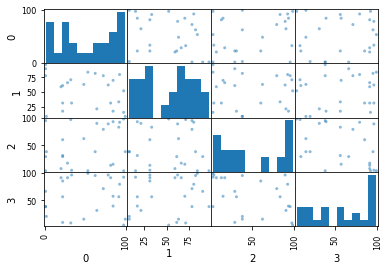

In [60]:
# データの用意
df = pd.DataFrame(np.random.randint(1, 100, size=(25, 4)))

# Matplotlibに関するマジックコマンドの実行
%matplotlib inline

# 散布図行列用のパッケージをインポート
from pandas.plotting import scatter_matrix
_ = scatter_matrix(df)

## DataFrameをNumPy配列に変換

[pandas.DataFrame.values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.values.html)

In [61]:
df = pd.DataFrame(np.arange(10).reshape((5, 2)))
df.values

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])